# ***Arabic sentiment analysis : Book recommendations***

***Installing necessary libraries***

In [1]:
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 10.0 MB/s eta 0:00:00


***Import Necessary Libraries***

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display
import plotly.graph_objs as go
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import string
from matplotlib import font_manager
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM, Dropout, GRU

In [4]:
# path of the dataset :
file_path = '/content/reviews.tsv.txt'

#Read the dataset using pandas with the correct delimiter
df = pd.read_csv(file_path, delimiter='\t')

In [5]:
df.head(5) # see the first 5 rows of our dataset

,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة."
0,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
1,4,32159373,1304410,3554772,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
2,1,442326656,11333112,3554772,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
3,5,46492258,580165,3554772,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...
4,5,25550893,1252226,3554772,"""عزازيل"" هو اسم رواية يوسف زيدان الثانية و ال..."


In [6]:
df.tail(5) #Visulize the last 5 rows of our dataset

,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة."
63251,5,108789247,3926131,1420,اجمل مسرحية ألفت في تاريخ الادب الانجليزي
63252,3,513749112,16666895,7286365,بصراحة، لم تكن هذه الرواية على قدر توقعاتي. ا...
63253,3,137280339,4303773,7286365,هي الرواية الأولى التي قرأتها لأيميلي نصر الل...
63254,3,175939769,4770537,7286365,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصاف...
63255,4,297750792,8242455,6083177,لم ادرك معنى العلاقات الخارجية و البروتكولات ...


In [7]:
df.columns.tolist() # show the list of dataFrame's columns

['4',
 '338670838',
 '7878381',
 '13431841',
 ' "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة. ']

In [8]:
#Set correct dataset column names :
#--------------------------------#

# Read the first rows to extract the column names
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Extract first row as column headers
header_line = lines[0].strip()
columns = header_line.split('\t')

# Show column names
print(f"extracted columns : {columns}")

extracted columns : ['4', '338670838', '7878381', '13431841', ' "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة.']


In [9]:
# Read the file ignoring headers (header=None) to process them manually
data = pd.read_csv(file_path, delimiter='\t', header=None, encoding='utf-8')

#Check the first rows to determine the column names
print(df.head())

# Set column names
columns = ['Rating', 'ReviewId', 'UserId', 'BookId', 'Review']

# Assign column names :
data.columns = columns

   4  338670838   7878381  13431841  \
0  4   39428407   1775679   3554772   
1  4   32159373   1304410   3554772   
2  1  442326656  11333112   3554772   
3  5   46492258    580165   3554772   
4  5   25550893   1252226   3554772   

   "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة.   
0   من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...                                                                                          

In [10]:
data

,Rating,ReviewId,UserId,BookId,Review
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني..."
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
2,4,32159373,1304410,3554772,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
3,1,442326656,11333112,3554772,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
4,5,46492258,580165,3554772,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...
...,...,...,...,...,...
63252,5,108789247,3926131,1420,اجمل مسرحية ألفت في تاريخ الادب الانجليزي
63253,3,513749112,16666895,7286365,بصراحة، لم تكن هذه الرواية على قدر توقعاتي. ا...
63254,3,137280339,4303773,7286365,هي الرواية الأولى التي قرأتها لأيميلي نصر الل...
63255,3,175939769,4770537,7286365,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصاف...


<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Rating</td>
      <td>User rating</td>
    </tr>
    <tr>
      <td>ReviewId</td>
      <td>Identifier of each comment, unique values</td>
    </tr>
    <tr>
      <td>UserId</td>
      <td>Identifier of each user, unique values</td>
    </tr>
    <tr>
      <td>BookId</td>
      <td>Identifier of each Book, unique values</td>
    </tr>
    <tr>
      <td>Review</td>
      <td>User comment</td>
    </tr>
  </tbody>
</table>


------------------------------

##***2-Data exploration***

###***Information***

In [11]:
data.info() #information of the DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63257 entries, 0 to 63256
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rating    63257 non-null  int64 
 1   ReviewId  63257 non-null  int64 
 2   UserId    63257 non-null  int64 
 3   BookId    63257 non-null  int64 
 4   Review    63257 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


In [12]:
data.dtypes  #verifying the column's types

,0
Rating,int64
ReviewId,int64
UserId,int64
BookId,int64
Review,object


------------------------------

###***Notes distribution***

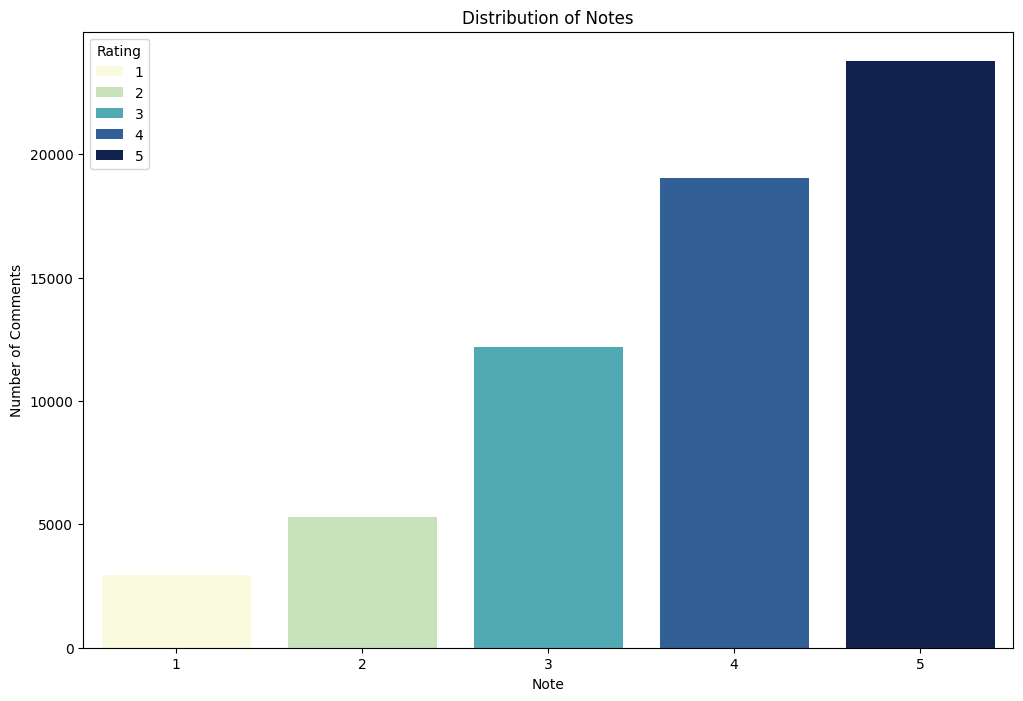

In [13]:
# View Notes distribution :
plt.figure(figsize=(12, 8))
sns.countplot(x='Rating', data=data, hue='Rating', palette='YlGnBu', dodge=False)
plt.title('Distribution of Notes')
plt.xlabel('Note')
plt.ylabel('Number of Comments')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.show()

In [ ]:
# Create an interactive chart with Plotly
fig = px.histogram(data, x='Rating', color='Rating',
                   title='Distribution of Notes',
                   labels={'Rating': 'Note'},
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    xaxis_title='Note',
    yaxis_title='Number of comments',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        tickmode='linear',
        tickvals=[1, 2, 3, 4, 5],
        ticktext=['1', '2', '3', '4', '5']
    ),
    bargap=0.2
)

#Show the interactif figure of distribution of notes:
fig.show()

***Comment*** :
*We observe that positive comments are the most prevalent in our dataset*, *which consists of 63,295 row*s. *This indicates that our dataset is not balanced*.

--------------------------------------

###***Wordcloud of the LABR dataset before removing stopwords***

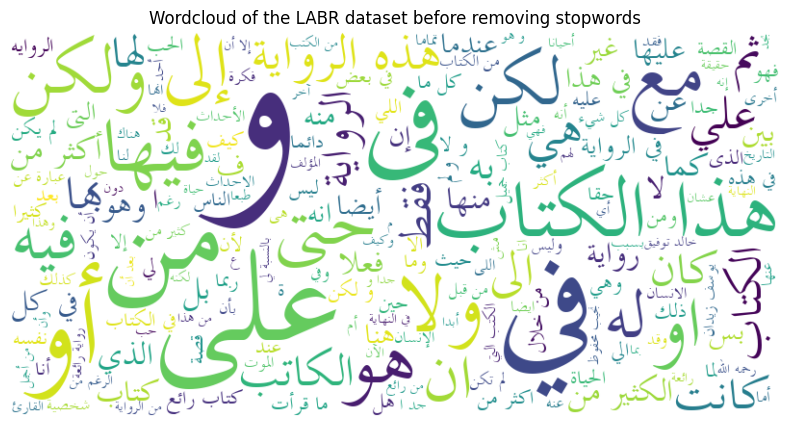

In [ ]:
# Concatenate all comments into a single string
all_reviews = ' '.join(data['Review'].astype(str))

# We have to have a font compatible with Arabic characters : we choose the arial police
font_path = '/content/Traditional-Arabic.ttf'

# Generate the Wordcloud with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_reviews)

# show the word cloud :
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of the LABR dataset before removing stopwords')
plt.show()

--------------------------------------

### ***The 30 most frequent words before cleaning***

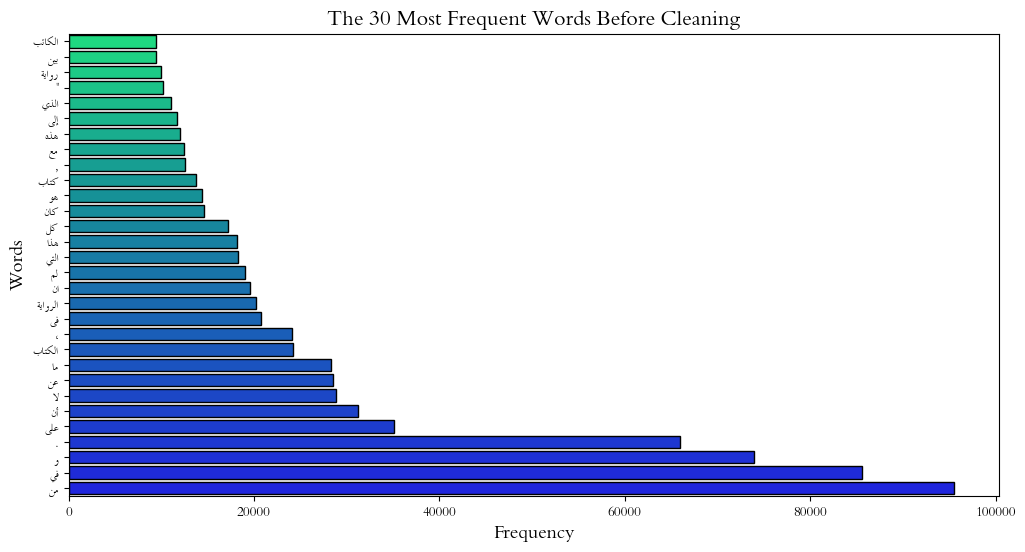

In [14]:
# The suitable police for readinf our arabic data :
font_path = '/content/Traditional-Arabic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Traditional Arabic'

# Tokenize words in Cleaned_Reviews
all_reviews = ' '.join(data['Review'])
words = all_reviews.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the 30 most frequent words
most_30_common_words = word_freq.most_common(30)

# Separate words and their frequencies for graphing
words, frequencies = zip(*most_30_common_words)

# Reshape and reorder Arabic words for correct display
reshaped_words = [arabic_reshaper.reshape(word) for word in words]
bidi_words = [get_display(word) for word in reshaped_words]

# create the bar chart :
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=bidi_words, palette='winter', edgecolor='black', hue=bidi_words)

# Invert the y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Add labels and title and showing the table :
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('The 30 Most Frequent Words Before Cleaning', fontsize=16)
plt.show()


------------------------

### ***The 30 Most Frequent Bigrams Before Removing Stopwords***

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


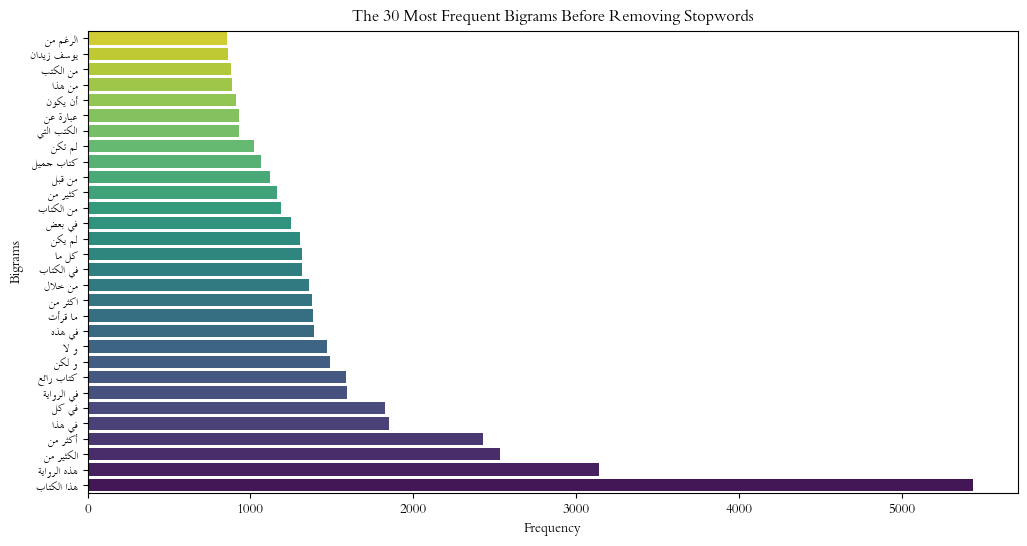

In [15]:
# Download the resources needed for nltk
nltk.download('punkt')

# Tokenize words
words = nltk.word_tokenize(all_reviews)

# Generate bigrams
bigrams = list(nltk.bigrams(words))

# Define a function to check if a bigram contains only alphabetic words
def is_alpha_bigram(bigram):
    return all(word.isalpha() for word in bigram)

# Filter bigrams to include only those with alphabetic words
filtered_bigrams = [bigram for bigram in bigrams if is_alpha_bigram(bigram)]

# Count the frequency of each bigram
bigram_freq = Counter(filtered_bigrams)

# Get the 10 most frequent bigrams
most_30_common_bigrams = bigram_freq.most_common(30)

# Separate bigrams and frequencies for graphing
bigrams, frequencies = zip(*most_30_common_bigrams)

# Reshape and reorder the Arabic bigrams for correct display
reshaped_bigrams = [' '.join([arabic_reshaper.reshape(word) for word in bigram]) for bigram in bigrams]
bidi_bigrams = [get_display(bigram) for bigram in reshaped_bigrams]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=bidi_bigrams, hue=bidi_bigrams, palette='viridis', legend=False)

# Invert y-axis to show the most frequent bigrams on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('The 30 Most Frequent Bigrams Before Removing Stopwords')

# Show the graph
plt.show()


-------------------------------------

### ***Distribution of comment lengths (in number of characters)***

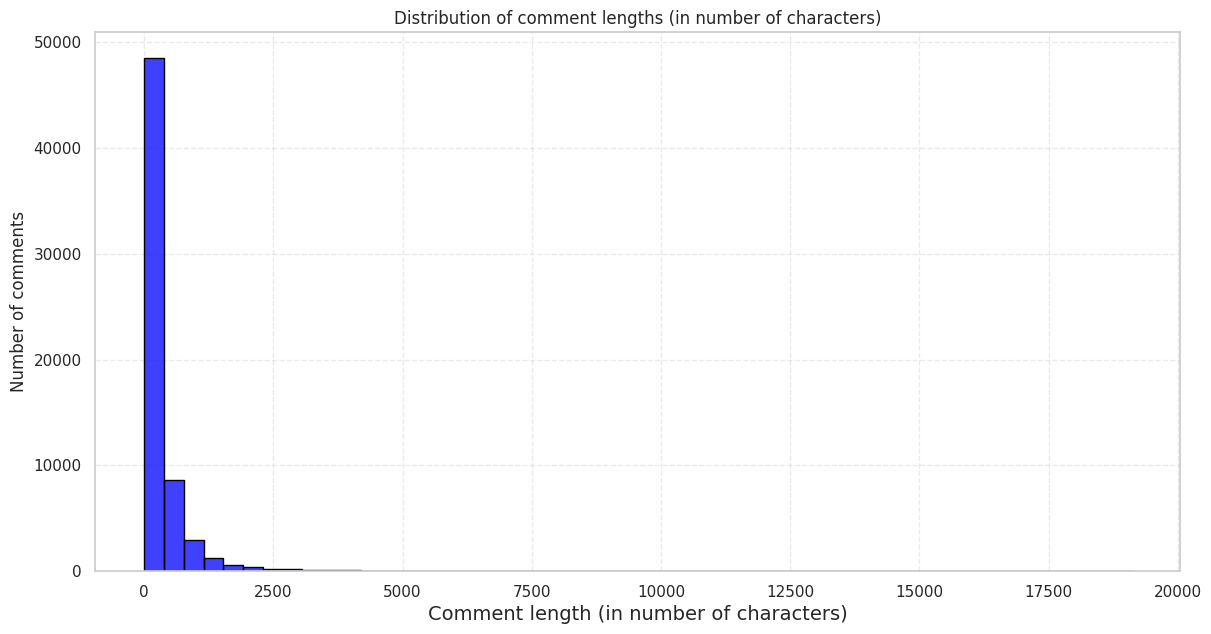

In [16]:
# Calculate the length of comments in number of characters
data['Length'] = data['Review'].apply(lambda x: len(x))  #create a nw column length
#the histog configuration :
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.histplot(data['Length'], bins=50, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of comment lengths (in number of characters)', fontsize=12)
plt.xlabel('Comment length (in number of characters)', fontsize=14)
plt.ylabel('Number of comments', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [ ]:
# Create the interactive histogram with Plotly
fig = px.histogram(data, x='Length', nbins=50,
                   title='Distribution of comment lengths (in number of characters)',
                   labels={'Length': 'Comment length (in number of characters)'},
                   color_discrete_sequence=['blue'])

fig.update_layout(
    xaxis_title='Comment length (in number of characters)',
    yaxis_title='Number of Comments',
    xaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    title_font_size=16,
    title_x=0.5,
)

fig.show()


--------------------------

###***Distribution of comment lengths (in number of words)***

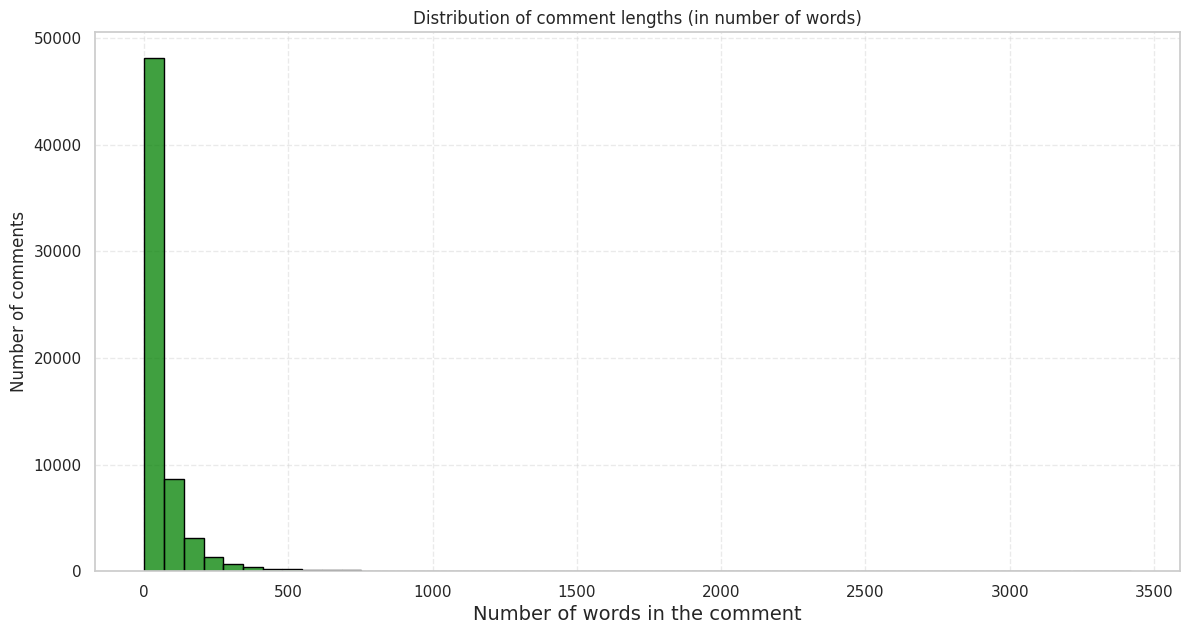

In [17]:
# Calculate the number of words in each comment:
data['Word_Count'] = data['Review'].apply(lambda x: len(x.split()))
#the histog configuration :
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.histplot(data['Word_Count'], bins=50, kde=False, color='green', edgecolor='black')
plt.title('Distribution of comment lengths (in number of words)', fontsize=12)
plt.xlabel('Number of words in the comment', fontsize=14)
plt.ylabel('Number of comments', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [ ]:
# Create the interactive histogram with Plotly
fig = px.histogram(data, x='Word_Count', nbins=50,
                   title='Distribution of comment lengths (in number of words)',
                   labels={'Word_Count': 'Number of words in the comment'},
                   color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title='Number of words in the comment',
    yaxis_title='Number of comments',
    xaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    title_font_size=16,
    title_x=0.5,
)

fig.show()

***Comment*** :
*The most frequent comments are those with a length between 1 and 2500*
*characters and a number of words between 1 and approximately 250 words*.

--------------------------

In [18]:
fig = px.scatter(data, x='Rating', y='Length',
                 title='Length of comments in relation to their rating',
                 labels={'Length': 'Comment length (in number of characters)',
                         'Rating': 'Rating'},
                 color='Rating',
                 color_continuous_scale='Viridis',
                 )

fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Comment length (in number of characters)',
    xaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='white', zeroline=False),
    title_font_size=16,
    title_x=0.5,
)

fig.show()

***Comment*** :
*We thus notice that the longer the comment*, *the more positive it is*.

In [19]:
data.head(2)

,Rating,ReviewId,UserId,BookId,Review,Length,Word_Count
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني...",618,106
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...,86,17


##***2-Data Cleaning***

###***Removing Stop Words, Punctuation and Numbers***

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Load the list of stopwords in Arabic
arabic_stopwords = set(stopwords.words('arabic'))
print(arabic_stopwords)

{'فيها', 'غدا', 'بما', 'ظ', 'خامس', 'تسعمئة', 'ثان', 'آض', 'بهم', 'غير', 'فلس', 'خمس', 'نبَّا', 'ساء', 'ذا', 'ذلكم', 'قد', 'أم', 'نعم', 'صبرا', 'عشرون', 'حزيران', 'ثمّة', 'هيّا', 'حقا', 'عاد', 'لدى', 'ب', 'لستم', 'يفعلان', 'ألا', 'ذين', 'بها', 'كأي', 'هنا', 'أسكن', 'ذواتا', 'تسعين', 'وا', 'همزة', 'ظلّ', 'لمّا', 'حدَث', 'أمسى', 'ش', 'أضحى', 'لا سيما', 'تخذ', 'خمسمائة', 'ثلاثمائة', 'لولا', 'أفعل به', 'بطآن', 'إلى', 'تانِ', 'قبل', 'كن', 'كأن', 'آب', 'هَذَيْنِ', 'أوّهْ', 'علق', 'إذ', 'اخلولق', 'إياكما', 'هَاتِي', 'ذان', 'أُفٍّ', 'سبعة', 'التي', 'راح', 'ّأيّان', 'هو', 'شيكل', 'قرش', 'إيهٍ', 'أف', 'فإن', 'ماذا', 'لهن', 'كانون', 'ثاني', 'نفس', 'هناك', 'جميع', 'هَاتَيْنِ', 'خمسون', 'فلا', 'لهم', 'وما', 'إيه', 'حَذارِ', 'ة', 'غين', 'بكن', 'جيم', 'تين', 'أعلم', 'طَق', 'ثلاثون', 'كذلك', 'ما', 'دواليك', 'هَؤلاء', 'هم', 'بك', 'ثمة', 'سبع', 'ذال', 'صبر', 'طاء', 'بعدا', 'لوما', 'تَيْنِ', 'الألى', 'يمين', 'من', 'لام', 'صهْ', 'ما برح', 'أنشأ', 'شتان', 'سوف', 'قام', 'لكنَّ', 'ن', 'سبعون', 'تلقاء', 'هاتا

In [22]:
# Function to clean comments by removing stopwords
def remove_stopwords(text, stopwords):
    # Clean up text by removing multiple spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    words = text.split()  # Divide text into words
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# Apply function to 'Review' column
data['Cleaned_Review'] = data['Review'].apply(lambda x: remove_stopwords(x, arabic_stopwords))

# Check the first few lines to make sure the stopwords have been removed
print(data[['Review', 'Cleaned_Review']].head())


                                              Review  \
0   "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني...   
1   من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...   
2   رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...   
3   إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...   
4   الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...   

                                      Cleaned_Review  
0  "عزازيل صنعناه ،الكامن أنفسنا" يذكرني يوسف زيد...  
1  أمتع قرأت روايات بلا شك. وحول الشك تدندن (عزاز...  
2  رواية تتخذ التاريخ ،جوًا اختار المؤلف فترة تار...  
3  إني أقدّر الرواية كثيرا، لسبب مختلف أسباب الآخ...  
4  الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...  


In [23]:
data

,Rating,ReviewId,UserId,BookId,Review,Length,Word_Count,Cleaned_Review
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني...",618,106,"""عزازيل صنعناه ،الكامن أنفسنا"" يذكرني يوسف زيد..."
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...,86,17,أمتع قرأت روايات بلا شك. وحول الشك تدندن (عزاز...
2,4,32159373,1304410,3554772,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...,193,32,رواية تتخذ التاريخ ،جوًا اختار المؤلف فترة تار...
3,1,442326656,11333112,3554772,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...,2786,538,إني أقدّر الرواية كثيرا، لسبب مختلف أسباب الآخ...
4,5,46492258,580165,3554772,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...,729,124,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
...,...,...,...,...,...,...,...,...
63252,5,108789247,3926131,1420,اجمل مسرحية ألفت في تاريخ الادب الانجليزي,42,7,اجمل مسرحية ألفت تاريخ الادب الانجليزي
63253,3,513749112,16666895,7286365,بصراحة، لم تكن هذه الرواية على قدر توقعاتي. ا...,522,85,بصراحة، تكن الرواية قدر توقعاتي. القصّة جميلة،...
63254,3,137280339,4303773,7286365,هي الرواية الأولى التي قرأتها لأيميلي نصر الل...,467,80,الرواية الأولى قرأتها لأيميلي نصر الله. بصفة أ...
63255,3,175939769,4770537,7286365,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصاف...,251,41,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصافح...


In [24]:
# Select two examples from the column 'Review' and 'Cleaned_Review'
comments = data[['Review', 'Cleaned_Review']].head(2)

# show the comments
print("Example of coments before and after cleaning :")
for index, row in comments.iterrows():
    print(f"Original comment : {row['Review']}")
    print(f"Cleaned comment  : {row['Cleaned_Review']}")
    print("----------------------------------------------------------------------------------")

Example of coments before and after cleaning :
Original comment :  "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني يوسف زيدان بــ بورخس في استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة و اختلاق وجود مترجـِم عاد بي إلى بورخس و هوامشه و كتَّابه الوهميين. هذه أولى قراءاتي ليوسف زيدان ،وهو عبقري في السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك في المتعة. هُنا يتجلى الشكُّ الراقي الممزوج بانسانية هيبا الفاتنة ربما تم تناول فكرة الرواية قبلاً ،ولكن هنا تفرداً و عذوبة لا تُقارن بنصٍ آخر كنتُ أودُّ لو صيغت النهاية بطريقة مختلفة فقد جاءت باردة لا تتناسب مع رواية خُطَّت بهذا الشغف . ولذا لا أستطيع منح الرواية خمس نجوم ،وإن كانت تجربة قرائية متفردة وممتعة. 
Cleaned comment  : "عزازيل صنعناه ،الكامن أنفسنا" يذكرني يوسف زيدان بــ بورخس استخدامه لحيلته الفنية،وخداع القاريء بأن الرواية ترجمة لمخطوط قديم. الهوامش المخترعة اختلاق وجود مترجـِم بورخس هوامشه كتَّابه الوهميين. أولى قراءاتي ليوسف زيدان ،وهو عبقري السرد ويخلقُ جوَّا ساحرا متفرداً يغرقك المتعة. هُنا يتجلى الشكُّ 

In [25]:
# Function to remove punctuation, including Arabic, and numbers in Western and Arabic formats
def clean_punctuation_and_numbers(text):
    # Arabic-specific punctuation
    arabic_punctuation = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''

    # Numbers in Arabic format
    arabic_digits = '٠١٢٣٤٥٦٧٨٩'

    # Create a combined set of punctuation and numbers to remove
    all_punctuations = string.punctuation + arabic_punctuation + arabic_digits

    # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', all_punctuations))

    # Remove western numerals
    text = re.sub(r'\d+', '', text)

    # Clean multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply function to clean punctuation and numbers in cleaned comments
data['Cleaned_Reviews'] = data['Cleaned_Review'].apply(clean_punctuation_and_numbers)

In [ ]:
data

,Rating,ReviewId,UserId,BookId,Review,Length,Word_Count,Cleaned_Review,Cleaned_Reviews
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني...",618,106,"""عزازيل صنعناه ،الكامن أنفسنا"" يذكرني يوسف زيد...",عزازيل صنعناه الكامن أنفسنا يذكرني يوسف زيدان ...
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...,86,17,أمتع قرأت روايات بلا شك. وحول الشك تدندن (عزاز...,أمتع قرأت روايات بلا شك وحول الشك تدندن عزازيل...
2,4,32159373,1304410,3554772,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...,193,32,رواية تتخذ التاريخ ،جوًا اختار المؤلف فترة تار...,رواية تتخذ التاريخ جوًا اختار المؤلف فترة تاري...
3,1,442326656,11333112,3554772,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...,2786,538,إني أقدّر الرواية كثيرا، لسبب مختلف أسباب الآخ...,إني أقدّر الرواية كثيرا لسبب مختلف أسباب الآخر...
4,5,46492258,580165,3554772,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...,729,124,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
...,...,...,...,...,...,...,...,...,...
63252,5,108789247,3926131,1420,اجمل مسرحية ألفت في تاريخ الادب الانجليزي,42,7,اجمل مسرحية ألفت تاريخ الادب الانجليزي,اجمل مسرحية ألفت تاريخ الادب الانجليزي
63253,3,513749112,16666895,7286365,بصراحة، لم تكن هذه الرواية على قدر توقعاتي. ا...,522,85,بصراحة، تكن الرواية قدر توقعاتي. القصّة جميلة،...,بصراحة تكن الرواية قدر توقعاتي القصّة جميلة ور...
63254,3,137280339,4303773,7286365,هي الرواية الأولى التي قرأتها لأيميلي نصر الل...,467,80,الرواية الأولى قرأتها لأيميلي نصر الله. بصفة أ...,الرواية الأولى قرأتها لأيميلي نصر الله بصفة أع...
63255,3,175939769,4770537,7286365,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصاف...,251,41,تَدْخل بيوت الناس، تدخل قلوبهم، تمدّ يدك تصافح...,تَدْخل بيوت الناس تدخل قلوبهم تمدّ يدك تصافح ا...


--------------------------

### ***Wordcloud of the LABR dataset After removing stopwords, Punctuation, and Numbers***

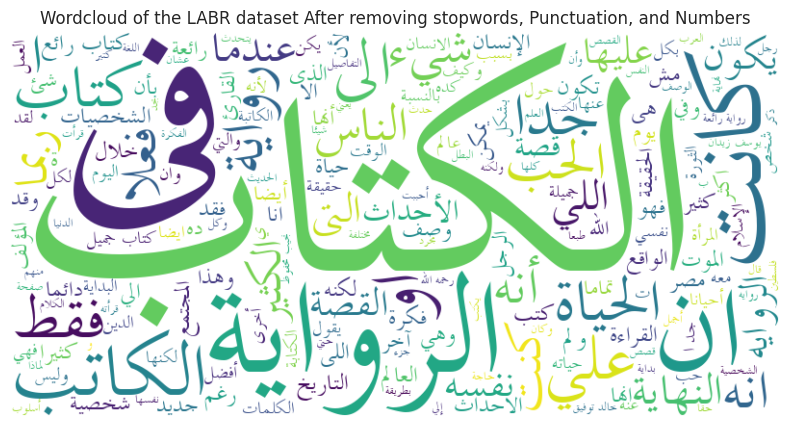

In [ ]:
# Concatenate all comments into a single string
all_cleaned_reviews = ' '.join(data['Cleaned_Reviews'].astype(str))

# We have to have a font compatible with Arabic characters : we choose the arial police
font_path = '/content/Traditional-Arabic.ttf'

# Generate the Wordcloud with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_cleaned_reviews)

# show the word cloud :
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of the LABR dataset After removing stopwords, Punctuation, and Numbers')
plt.show()


------------------------------------

### ***The 30 Most Frequent Words After Removing Stopwords, Punctuation, and Numbers***

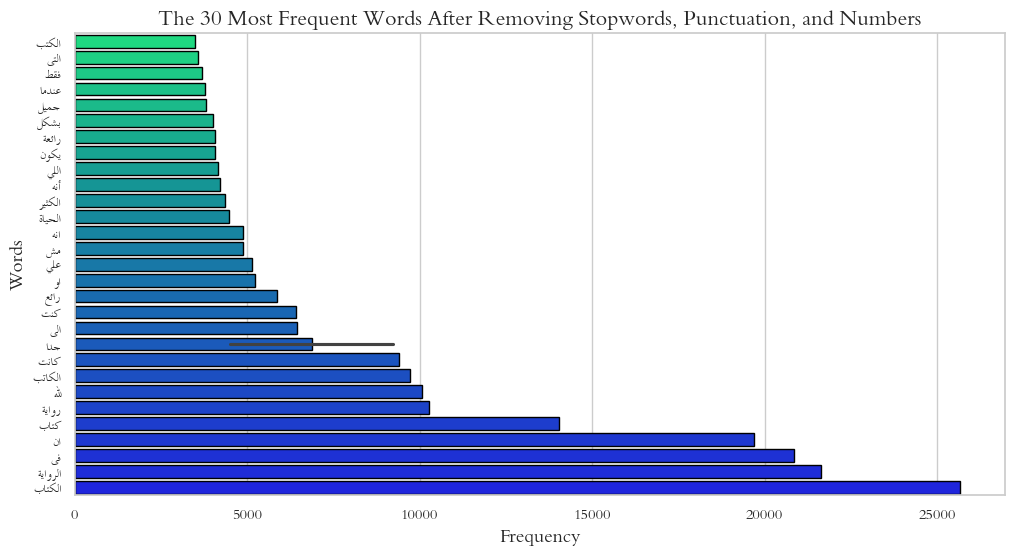

In [ ]:
# The suitable police for readinf our arabic data :
font_path = '/content/Traditional-Arabic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Traditional Arabic'

# Tokenize words in Cleaned_Reviews
all_cleaned_reviews = ' '.join(data['Cleaned_Reviews'])
words = all_cleaned_reviews.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the 30 most frequent words
most_30_common_words = word_freq.most_common(30)

# Separate words and their frequencies for graphing
words, frequencies = zip(*most_30_common_words)

# Reshape and reorder Arabic words for correct display
reshaped_words = [arabic_reshaper.reshape(word) for word in words]
bidi_words = [get_display(word) for word in reshaped_words]

# create the bar chart :
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=bidi_words, palette='winter', edgecolor='black', hue=bidi_words)

# Invert the y-axis to show the most frequent words at the top
plt.gca().invert_yaxis()

# Add labels and title and showing the table :
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('The 30 Most Frequent Words After Removing Stopwords, Punctuation, and Numbers', fontsize=16)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


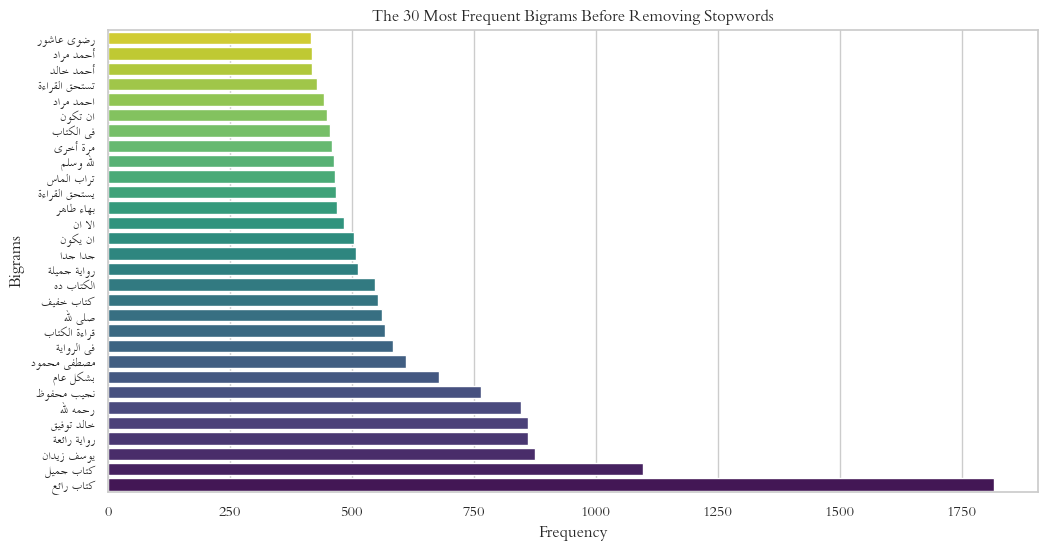

In [ ]:
# The suitable police for readinf our arabic data :
font_path = '/content/Traditional-Arabic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Traditional Arabic'

# Download the resources needed for nltk
nltk.download('punkt')

# Tokenize words
all_cleaned_reviews = ' '.join(data['Cleaned_Reviews'])
words = nltk.word_tokenize(all_cleaned_reviews)

# Generate bigrams
bigrams = list(nltk.bigrams(words))

# Define a function to check if a bigram contains only alphabetic words
def is_alpha_bigram(bigram):
    return all(word.isalpha() for word in bigram)

# Filter bigrams to include only those with alphabetic words
filtered_bigrams = [bigram for bigram in bigrams if is_alpha_bigram(bigram)]

# Count the frequency of each bigram
bigram_freq = Counter(filtered_bigrams)

# Get the 30 most frequent bigrams
most_30_common_bigrams = bigram_freq.most_common(30)

# Separate bigrams and frequencies for graphing
bigrams, frequencies = zip(*most_30_common_bigrams)

# Reshape and reorder the Arabic bigrams for correct display
reshaped_bigrams = [' '.join([arabic_reshaper.reshape(word) for word in bigram]) for bigram in bigrams]
bidi_bigrams = [get_display(bigram) for bigram in reshaped_bigrams]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=bidi_bigrams, hue=bidi_bigrams, palette='viridis', legend=False)

# Invert y-axis to show the most frequent bigrams on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('The 30 Most Frequent Bigrams Before Removing Stopwords')

# Show the graph
plt.show()


### ***Deleting Columns that we don't need***

In [26]:
# List of columns to drop :
columns_to_drop = ['ReviewId','Review', 'UserId', 'BookId', 'Length', 'Word_Count', 'Cleaned_Review']

# removing theses columns :
data_cleaned = data.drop(columns=columns_to_drop)

In [27]:
data_cleaned

,Rating,Cleaned_Reviews
0,4,عزازيل صنعناه الكامن أنفسنا يذكرني يوسف زيدان ...
1,4,أمتع قرأت روايات بلا شك وحول الشك تدندن عزازيل...
2,4,رواية تتخذ التاريخ جوًا اختار المؤلف فترة تاري...
3,1,إني أقدّر الرواية كثيرا لسبب مختلف أسباب الآخر...
4,5,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
...,...,...
63252,5,اجمل مسرحية ألفت تاريخ الادب الانجليزي
63253,3,بصراحة تكن الرواية قدر توقعاتي القصّة جميلة ور...
63254,3,الرواية الأولى قرأتها لأيميلي نصر الله بصفة أع...
63255,3,تَدْخل بيوت الناس تدخل قلوبهم تمدّ يدك تصافح ا...


In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63257 entries, 0 to 63256
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rating           63257 non-null  int64 
 1   Cleaned_Reviews  63257 non-null  object
dtypes: int64(1), object(1)
memory usage: 988.5+ KB


*********************

In [ ]:
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [ ]:
dataset=pd.read_csv('/content/data_cleaned.csv')

In [ ]:
dataset

,Rating,Cleaned_Reviews
0,4,عزازيل صنعناه الكامن أنفسنا يذكرني يوسف زيدان ...
1,4,أمتع قرأت روايات بلا شك وحول الشك تدندن عزازيل...
2,4,رواية تتخذ التاريخ جوًا اختار المؤلف فترة تاري...
3,1,إني أقدّر الرواية كثيرا لسبب مختلف أسباب الآخر...
4,5,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
...,...,...
63252,5,اجمل مسرحية ألفت تاريخ الادب الانجليزي
63253,3,بصراحة تكن الرواية قدر توقعاتي القصّة جميلة ور...
63254,3,الرواية الأولى قرأتها لأيميلي نصر الله بصفة أع...
63255,3,تَدْخل بيوت الناس تدخل قلوبهم تمدّ يدك تصافح ا...


In [ ]:
dataset.dtypes

,0
Rating,int64
Cleaned_Reviews,object


*************************************

In [64]:
# Displaying unique values ​​before change
print("Valeurs uniques avant : ", data_cleaned['Rating'].unique())

# Filter the DataFrame to keep only ratings 1 and 5
data_filtered = data_cleaned[data_cleaned['Rating'].isin([1, 5])]

# Checking for unique values ​​after filtering
print("Valeurs uniques après : ", data_filtered['Rating'].unique())

# Reset index if necessary
data_filtered.reset_index(drop=True, inplace=True)

# Displaying the filtered DataFrame
print(data_filtered)

Valeurs uniques avant :  [4 1 5 3 2]
Valeurs uniques après :  [1 5]
       Rating                                    Cleaned_Reviews
0           1  إني أقدّر الرواية كثيرا لسبب مختلف أسباب الآخر...
1           5  الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
2           5  عزازيل اسم رواية يوسف زيدان الثانية صَدرت مؤخر...
3           5  البدايةولكن بداية مشوقة للغايةيبدو انني وقعت ك...
4           5  تجاربى الناجحه يوسف زيدان وقعت يدى روايه عزازي...
...       ...                                                ...
26712       5  كبير شكسبير اجمل المسرحيات اطلاقا المسرحية عبا...
26713       5  قصة جيدة خصوصا وضعتها سياقها الزمني غضضت البصر...
26714       5  روايه اكثر رائعه اصدق انني اغفلت روائع شكسبير ...
26715       5                  فلسفه بودن نبودنمان هنوز نيستعجبا
26716       5             اجمل مسرحية ألفت تاريخ الادب الانجليزي

[26717 rows x 2 columns]


In [67]:
data_filtered

,Rating,Cleaned_Reviews
0,1,إني أقدّر الرواية كثيرا لسبب مختلف أسباب الآخر...
1,5,الكاهن أطلق نفسه اسم هيبا تيمنا بالعالمة الوثن...
2,5,عزازيل اسم رواية يوسف زيدان الثانية صَدرت مؤخر...
3,5,البدايةولكن بداية مشوقة للغايةيبدو انني وقعت ك...
4,5,تجاربى الناجحه يوسف زيدان وقعت يدى روايه عزازي...
...,...,...
26712,5,كبير شكسبير اجمل المسرحيات اطلاقا المسرحية عبا...
26713,5,قصة جيدة خصوصا وضعتها سياقها الزمني غضضت البصر...
26714,5,روايه اكثر رائعه اصدق انني اغفلت روائع شكسبير ...
26715,5,فلسفه بودن نبودنمان هنوز نيستعجبا


In [70]:
# Removing unwanted classes :
data_cleaned = data_cleaned.loc[data_cleaned['Rating'].isin([1, 5])]

# Converting classes to digital
data_cleaned.loc[:, 'Rating'] = data_cleaned['Rating'].map({1: 0, 5: 1})  # 0 for 1 et 1 for 5

# Separation of features and labels
X = data_cleaned['Cleaned_Reviews']
y = data_cleaned['Rating']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)  # Limitez le vocabulaire à 10 000 mots
tokenizer.fit_on_texts(X_train)

# Transforming texts into sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to have uniform lengths
max_length = 250
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')


***LSTM Model***

In [73]:
# Define the model lstm
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # Pour classification binaire

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [80]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 250, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 250, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 250, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,383,173 (16.72 MB)

 Trainable params: 1,461,057 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,922,116 (11.15 MB)

In [82]:
# training the model
history = model.fit(X_train_padded, y_train,
                    epochs=3,
                    validation_data=(X_test_padded, y_test),
                    batch_size=64)


Epoch 1/3
298/298 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 1.0000 - loss: 2.9082e-06 - val_accuracy: 1.0000 - val_loss: 2.4172e-06
Epoch 2/3
298/298 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 1.0000 - loss: 2.4021e-06 - val_accuracy: 1.0000 - val_loss: 2.0111e-06
Epoch 3/3
298/298 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 1.0000 - loss: 1.9975e-06 - val_accuracy: 1.0000 - val_loss: 1.6830e-06


In [77]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 3.7681e-06
Loss: 3.7682220863644034e-06, Accuracy: 1.0


***GRU model***

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [87]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 250, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 250, 128)            │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 250, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,249,157 (16.21 MB)

 Trainable params: 1,416,385 (5.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,832,772 (10.81 MB)

In [84]:
model.fit(X_train_padded, y_train, epochs=3, validation_data=(X_test_padded, y_test))

Epoch 1/3
595/595 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9883 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 1.7987e-05
Epoch 2/3
595/595 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 1.0000 - loss: 1.7495e-05 - val_accuracy: 1.0000 - val_loss: 8.6242e-06
Epoch 3/3
595/595 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 1.0000 - loss: 8.4318e-06 - val_accuracy: 1.0000 - val_loss: 4.8426e-06


In [86]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 4.8424e-06
Loss: 4.842574071517447e-06, Accuracy: 1.0
